<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionBPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section B HW - MAT421
Questions based off of chapter 17 of the text.

## Problem 1: Linear Interpolation
This code will find the linear interpolation of a supplied array, given certain experimental data points.

In [2]:
import numpy as np


def my_lin_interp(x,y,X):

  Y = [0]*len(X)

  #iterate through X
  for i in range(0,len(X),1):
    
    #find smallest number in x that current point is larger than 
    # print(X[i])
    j = 0
    while x[j] < X[i]:
      j += 1

    x1 = x[j-1]
    x2 = x[j]
    # print("X value between " + str(x1) + " and " + str(x2))
    y1 = y[j-1]
    y2 = y[j]
    
    answer = y1 + ( ((y2 - y1)*(X[i] - x1)) / (x2 - x1) )
    # print("y value " + str(answer))

    Y[i] = answer
  return Y

my_lin_interp([0,1,2],[1,3,2],[0.5,1,1.5,1.75])


[2.0, 3.0, 2.5, 2.25]

## Testing the linear interpolation
This code tests the linear interpolation function above with a range of values based on the experimental points marked in red.

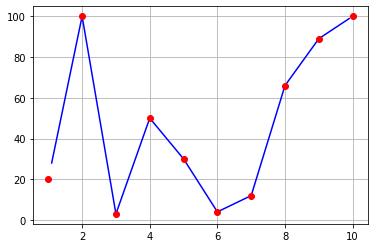

In [14]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10]
y = [20,100,3,50,30,4,12,66,89,100]
x_new = np.arange(1.1,10,0.1)
y_new = my_lin_interp(x,y,x_new)

plt.plot(x_new,y_new,'b')
plt.plot(x,y,'ro')
plt.grid()


## Problem 2: Cubic Spline
This program will return the cubic spline interpolation of a supplied set of points (in its domain). Again this interpolation is based on a set of provided experimental points. Here we see a graphical representation of this cubic spline (plotted in MATLAB). It is very elegant how each function gently leads into the next. More testing of the cubic spline further below.


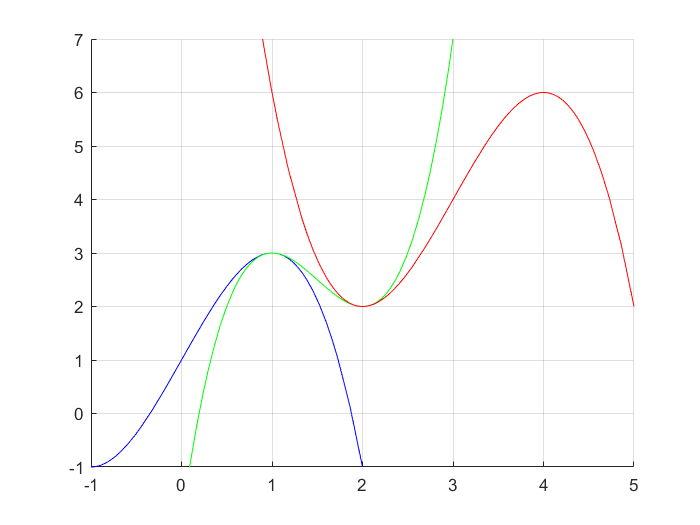

In [3]:
def my_cubic_spline(x,y,X):

  #number of equations
  n = len(x)
  dim = ((n-1)*4,(n-1)*4)
  A = np.zeros(dim)
  b = np.ones(4*(n-1))

  #rowcount - important for keeping track of which equation we are on
  rowcount = 0
  


  #build first constraint
  dim1 = (n-1,4*(n-1))
  A1 = np.zeros(dim1)

  startpoint = 0;
  for i in range(0,n-1,1):
    power = 3
    for j in range(startpoint,startpoint+4,1):
      A1[i,j] = x[i]**power
      power -= 1
    startpoint += 4
    b[i] = y[i]
    rowcount += 1


  #build second constraint
  dim2 = (n-1,4*(n-1))
  A2 = np.zeros(dim2)
  
  startpoint = 0;
  for i in range(0,n-1,1):
    power = 3
    for j in range(startpoint,startpoint+4,1):
      A2[i,j] = x[i+1]**power
      power -= 1
    startpoint += 4
    b[i+(n-1)] = y[i+1]
    rowcount += 1

  

  #third constraint
  dim3 = (n-2,4*(n-1))
  A3 = np.zeros(dim3)
  
  for i in range(0,n-2,1):
    

      A3[i,0+4*i] = 3 * (x[i+1]**2)
      A3[i,1+4*i] = 2 * x[i+1]
      A3[i,2+4*i] = 1

      A3[i,4 + 4*i] = -3 * (x[i+1]**2)
      A3[i,5 + 4*i] = -2 * x[i+1]
      A3[i,6 + 4*i] = -1
      b[rowcount] = 0
      rowcount += 1
  

  #fourth constraint
  dim4 = (n-2,4*(n-1))
  A4 = np.zeros(dim4)
  
  
  for i in range(0,n-2,1):
    
      A4[i,0+4*i] = 6 * (x[i+1])
      A4[i,1+4*i] = 2

      A4[i,4 + 4*i] = -6 * (x[i+1])
      A4[i,5 + 4*i] = -2
      b[rowcount] = 0
      rowcount += 1

  
  #fifth constraint
  dim5 = (2,4*(n-1))
  A5 = np.zeros(dim5)

  A5[0,0] = 6 * x[0]
  A5[0,1] = 2
  A5[1,4*(n-2)] = 6 * x[n-1]
  A5[1,4*(n-2) + 1] = 2

  b[rowcount] = 0
  rowcount += 1
  b[rowcount] = 0
  rowcount += 1

  #initialize final matrix representing the system of equations

  dim = (len(b),len(b))
  A = np.zeros(dim)

  #concatenating all the result matrices together
  row = 0
  for i in range(0,len(A1),1):
    A[i,:] = A1[i,:]
    row += 1
  offset = row
  for i in range(0,len(A2),1):
    A[i+offset,:] = A2[i,:]
    row += 1
  offset = row
  for i in range(0,len(A3),1):
    A[i+offset,:] = A3[i,:]
    row += 1
  offset = row
  for i in range(0,len(A4),1):
    A[i+offset,:] = A4[i,:]
    row += 1
  offset = row
  for i in range(0,len(A5),1):
    A[i+offset,:] = A5[i,:]
    row += 1

  
  #solving the system of equatons using the numPy built in functions to get coefficients of our cubic equations

  coef = np.dot(np.linalg.inv(A), b)
  print("Coefficients: ")
  print(coef)



  #evaluating at the given points
  Y = [0] * len(X)
  for i in range(0,len(X),1):
    j = 0
    while x[j] < X[i]:
      j += 1
    index = j-1
    
    term1 = coef[4*index]
    term2 = coef[4*index + 1]
    term3 = coef[4*index + 2]
    term4 = coef[4*index + 3]

    
    Y[i] = term1 * (X[i] ** 3) + term2 * (X[i]**2) + term3 * X[i] + term4
  print("Interpolation:")
  return Y

#should return points congruent with the graph
my_cubic_spline([0,1,2,3],[1,3,2,4],[0.2,0.5,1.5,2.4,2.9])



Coefficients: 
[ -1.   0.   3.   1.   2.  -9.  12.  -2.  -1.   9. -24.  22.]
Interpolation:


[1.591999999999998,
 2.3749999999999987,
 2.500000000000009,
 2.416000000000018,
 3.701000000000029]

## Testing the cubic spline
This code can be used to pass values to, then plot the values computed by the cubic spline code above. The same sample values from above have been entered, and the experimental points are marked in red.

Coefficients: 
[-5.89965717e+01  1.76989715e+02 -3.79931434e+01 -6.00000000e+01
  1.17982859e+02 -8.84886866e+02  2.08576002e+03 -1.47583544e+03
 -9.19348625e+01  1.00437262e+03 -3.58201845e+03  4.19194303e+03
  3.87565914e+01 -5.63924824e+02  2.69117134e+03 -4.17231003e+03
 -2.09150327e+00  4.87965964e+01 -3.72435763e+02  9.33701813e+02
  9.60942163e+00 -1.61820052e+02  8.91264126e+02 -1.59369797e+03
 -2.43461833e+01  5.51247651e+02 -4.10020979e+03  1.00530745e+04
  1.07753114e+01 -2.91668220e+02  2.64311718e+03 -7.92913074e+03
  2.44937724e-01 -7.34813171e+00  8.42363793e+01 -2.52488346e+02]
Interpolation:


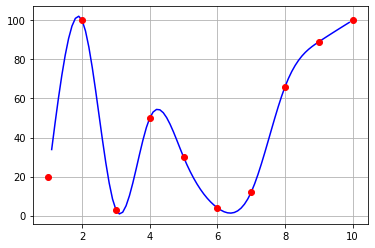

In [4]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10]
y = [20,100,3,50,30,4,12,66,89,100]
x_new = np.arange(1.1,10,0.1)
y_new = my_cubic_spline(x,y,x_new)

plt.plot(x_new,y_new,'b')
plt.plot(x,y,'ro')
plt.grid()
